In [167]:
import numpy as np
import pandas as pd

In [168]:
data_set = pd.read_csv('Flight_Price_Dataset_Q2.csv')
X = data_set.drop(columns='price')
Y = data_set['price']

In [169]:
#Data Splitting
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [170]:
#Data Filling
data_set.isnull().sum()

departure_time    0
stops             0
arrival_time      0
class             0
duration          0
days_left         0
price             0
dtype: int64

In [171]:
#Data Encoding

x_train['departure_time_encoded'] = x_train['departure_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})
x_test['departure_time_encoded'] = x_test['departure_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})

x_train['arrival_time_encoded'] = x_train['arrival_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})
x_test['arrival_time_encoded'] = x_test['arrival_time'].map({'Early_Morning': 1, 'Morning': 2, 'Afternoon': 3, 'Evening': 4, 'Night': 5, 'Late_Night': 6})

x_train['stops_encoded'] = x_train['stops'].map({'zero': 1, 'one': 2, 'two_or_more': 3})
x_test['stops_encoded'] = x_test['stops'].map({'zero': 1, 'one': 2, 'two_or_more': 3})

x_train['class_encoded'] = x_train['class'].map({'Economy': 1, 'Business': 2})
x_test['class_encoded'] = x_test['class'].map({'Economy': 1, 'Business': 2})


x_train = x_train.drop(columns=['departure_time', 'arrival_time', 'stops', 'class'])
x_test = x_test.drop(columns=['departure_time', 'arrival_time', 'stops', 'class'])

In [172]:
x_train

,duration,days_left,departure_time_encoded,arrival_time_encoded,stops_encoded,class_encoded
136430,11.42,38,5,1,2,1
244582,15.75,33,1,5,2,2
154619,6.25,12,2,4,2,1
91350,16.25,42,3,1,2,1
199745,5.58,2,3,4,2,2
...,...,...,...,...,...,...
143312,26.58,7,5,5,2,1
47289,27.33,48,2,3,2,1
206847,23.08,48,4,4,2,2
104273,11.42,5,2,4,2,1


In [173]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns, index=x_train.index)
x_test = pd.DataFrame(scaler.fit_transform(x_test), columns=x_test.columns, index=x_test.index)

In [174]:
from sklearn.metrics import mean_squared_error , r2_score
import time

class Regression:
    def __init__(self):
        self.mse_g = None
        self.r2_g = None
        self.weight = None

    def fit(self, x:pd.DataFrame, y:pd.DataFrame, epoch:int, learning_rate: int):
        m = len(x)
        if x.iloc[0, 0] != 1:
            x.insert(0, 'bias', 1)

        self.mse_g = np.ones(epoch)
        self.r2_g = np.ones(epoch)
        self.weight = np.ones(len(x_train.columns))

        start_time = time.time()
        for i in range(epoch):
            gradient = 2/m * x.T.dot(self.predict(x) - y)
            self.weight = self.weight - learning_rate * gradient
            self.mse_g[i] = mean_squared_error(y, self.predict(x))
            self.r2_g[i] = r2_score(y, self.predict(x))
        print ("My program took", time.time() - start_time, "to run")

    def predict(self, df:pd.DataFrame):
        if df.iloc[0, 0] != 1:
            df.insert(0, 'bias', 1)
        return np.dot(df, self.weight)

In [188]:
reg = Regression()

epochs = 200
reg.fit(x_train, y_train, epochs, 0.1)
reg.weight

My program took 1.6511385440826416 to run


bias                       5182.139065
duration                   4086.485583
days_left                 -2790.163363
departure_time_encoded      791.415311
arrival_time_encoded       1674.982908
stops_encoded              5483.494595
class_encoded             40584.174325
dtype: float64

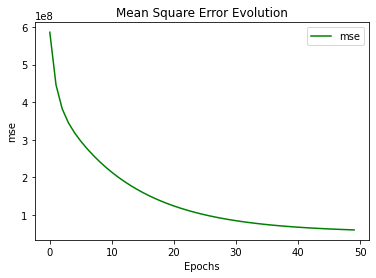

In [189]:
#mse plot
import matplotlib.pyplot as plt

plt.plot(range(epochs), reg.mse_g, 'g', label='mse')
plt.title('Mean Square Error Evolution')
plt.xlabel('Epochs')
plt.ylabel('mse')
plt.legend()
plt.show()

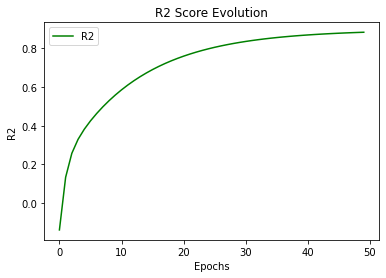

In [190]:
#R2 plot
plt.plot(range(epochs), reg.r2_g, 'g', label='R2')
plt.title('R2 Score Evolution')
plt.xlabel('Epochs')
plt.ylabel('R2')
plt.legend()
plt.show()

In [191]:
#Evaluating Model
from sklearn.metrics import mean_absolute_error, mean_squared_error
y_pred_test = reg.predict(x_test)

mae_test = mean_absolute_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)

ev_tabel = pd.DataFrame({'Value': [mae_test, mse_test, rmse_test, r2_test]}, index=['MAE', 'MSE', 'RMSE', 'R2'])
ev_tabel

,Value
MAE,5.258201e+03
MSE,6.014657e+07
RMSE,7.755422e+03
R2,8.840335e-01
